In [1]:
!apt-get install aria2 > /dev/null

In [2]:
!aria2c -x 16 -s 16 https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip > /dev/null 
!aria2c -x 16 -s 16 https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip > /dev/null

In [ ]:
!unzip /content/Flickr8k_Dataset.zip > /dev/null
!unzip /content/Flickr8k_text.zip > /dev/null
!rm *.zip > /dev/null

In [4]:
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm_notebook as tqdm

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [5]:
def clean_description(desc, stopwords):

  cleaned = desc.lower()
  cleaned = re.sub('[^a-z]',' ',cleaned)
  tokens = cleaned.split(' ')
  cleaned = ' '.join([w for w in tokens if w not in stopwords and len(w)>1])
  
  return cleaned

In [6]:
def get_vocabulary(dictionary):
  vocab = set()

  for desc_list in dictionary.values():
    for desc in desc_list:
      words = desc.split(' ')
      for word in words:
        vocab.add(word)

  return vocab

In [7]:
with open('/content/Flickr8k.token.txt', 'r') as f:
  all_desc = f.read().split('\n')

In [8]:
# Some sample data
all_desc[:5]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .']

In [9]:
stopwords = ['is', 'an', 'a', 'the', 'was']

In [10]:
all_dict = dict()

for desc in all_desc:
  if len(desc) < 1:
    continue
  file_name, file_desc = desc.split('\t')[0].split('.')[0], desc.split('\t')[1]
  
  if file_name not in all_dict.keys():
    all_dict[file_name] = []
  
  cleaned_desc = clean_description(file_desc, stopwords)
  cleaned_desc = 'startseq ' + cleaned_desc + ' endseq'

  all_dict[file_name].append(cleaned_desc)

In [11]:
vocab = get_vocabulary(all_dict)

In [12]:
print(len(all_dict))
print(len(vocab))

8092
8423


In [13]:
!wget https://banner2.cleanpng.com/20181128/vpu/kisspng-cloud-computing-scalable-vector-graphics-joruri-po-5bfe80dc1e3ab9.9777518815434057881238.jpg > /dev/null

--2020-06-27 18:09:28--  https://banner2.cleanpng.com/20181128/vpu/kisspng-cloud-computing-scalable-vector-graphics-joruri-po-5bfe80dc1e3ab9.9777518815434057881238.jpg
Resolving banner2.cleanpng.com (banner2.cleanpng.com)... 104.28.27.233, 172.67.162.159, 104.28.26.233, ...
Connecting to banner2.cleanpng.com (banner2.cleanpng.com)|104.28.27.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22116 (22K) [image/jpeg]
Saving to: ‘kisspng-cloud-computing-scalable-vector-graphics-joruri-po-5bfe80dc1e3ab9.9777518815434057881238.jpg.2’

kisspng-cloud-compu 100%[===================>]  21.60K  --.-KB/s    in 0.001s  

2020-06-27 18:09:28 (25.8 MB/s) - ‘kisspng-cloud-computing-scalable-vector-graphics-joruri-po-5bfe80dc1e3ab9.9777518815434057881238.jpg.2’ saved [22116/22116]



In [18]:
mask = np.array(Image.open('kisspng-cloud-computing-scalable-vector-graphics-joruri-po-5bfe80dc1e3ab9.9777518815434057881238.jpg'))
wordcloud = WordCloud(width = 500, height = 400, 
                  background_color ='black', 
                  min_font_size = 10,
                  mask=mask, random_state=0).generate(' '.join(vocab)) 

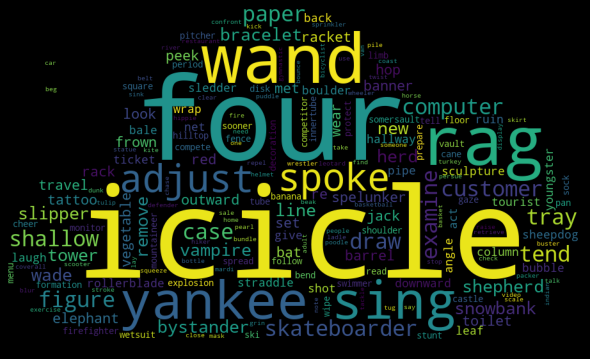

In [19]:
plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k' ) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()